In [1]:
import numpy as np
import gennoisy
import matplotlib.pylab as plt
import pandas as pd

%matplotlib inline

In [2]:
def sigmoid(X):
    return 1./(1 + np.exp(-X))

def dsigmoid(X):
    return sigmoid(X)*(1 - sigmoid(X))

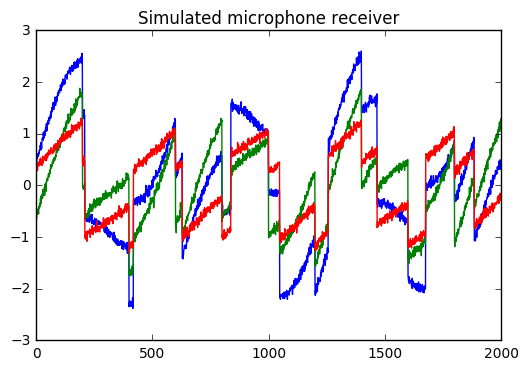

In [5]:
X,S,A,N = gennoisy.gennoisy()
plt.plot(X); plt.title('Simulated microphone receiver')

### Likelihood function:

$$ p(x) = \prod_{i=1}^n p_s(w_i^T x) \cdot | W | $$

In [6]:
def likelihood(W,X):
    return sigmoid(  W.dot(X.T)  ).prod(axis=0) * np.linalg.det(W)

### Loss function

$$ \ell(W) = \sum_i^m \left( \sum_j^n \log \sigma'(w_j^T x^{(i)}) + log |W| \right) $$

In [7]:
def lossfxn(W,X):
    return np.log( dsigmoid( W.dot(X.T).sum(axis=0) ) ) + np.log( np.linalg.det(W) )

### Update equation is:

$$W := W + \alpha \left( \left[ \begin{array}{c}
1 - 2 \sigma( w_1^T x^{(i)} ) \\
1 - 2 \sigma( w_2^T x^{(i)} ) \\
1 - 2 \sigma( w_3^T x^{(i)} ) \\
\vdots \\
1 - 2 \sigma( w_4^T x^{(i)} )
\end{array} \right] x^{(i) T} + (W^T)^{-1} \right) $$

In [8]:
def update(W, X, alpha=0.0001):
    return alpha*(1 - 2*sigmoid(W.dot(X.T))).dot(X) + np.linalg.inv( W.T )

In [9]:
W = np.random.rand(*A.shape)
lossfxn(W,X)
losses = []

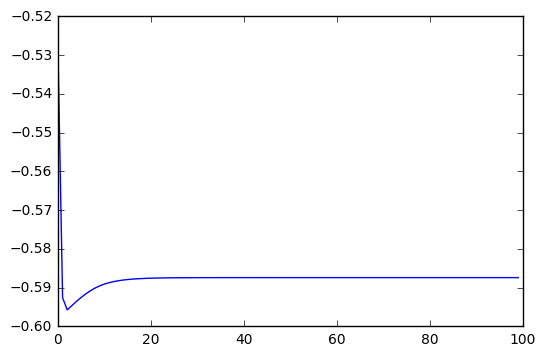

In [10]:
for j in range(100):
    for i in range(1000):
        W = W + update(W, X)
    losses += [np.log( likelihood(W,X) ).mean()]

plt.plot(np.array(losses))

[[ -0.40472101   7.79636907   2.01729403]
 [ -6.52010421  -2.39033499  15.91911193]
 [ 13.24867464 -12.10093047  -8.86538914]]


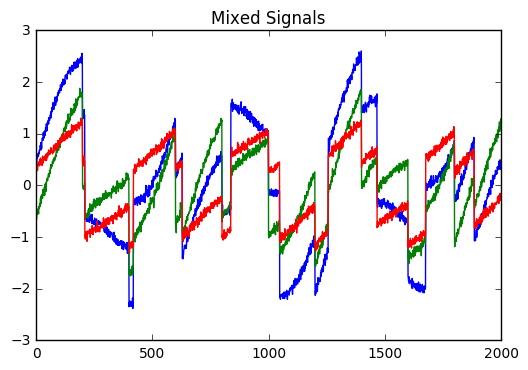

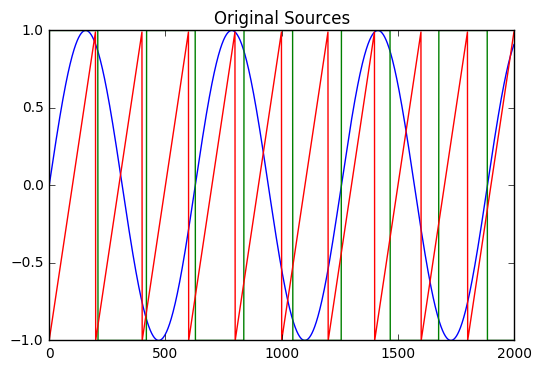

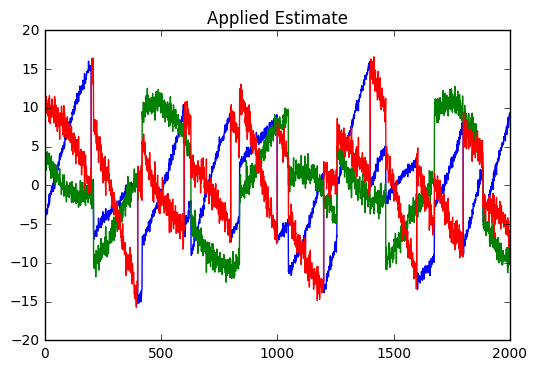

In [11]:
print(W)
Sp = W.dot(X.T)
plt.plot(X); plt.title('Mixed Signals')
plt.figure()
plt.plot(S); plt.title('Original Sources')
plt.figure()
plt.plot(Sp.T); plt.title('Applied Estimate')